# Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель t-SNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

### Загружаем данные базы г.Бостона аналогично предыдущему ДЗ

In [64]:
import numpy as np
import pandas as pd
import matplotlib as mp

from urllib.request import urlretrieve

data_url = "http://lib.stat.cmu.edu/datasets/boston"
csv_file = "d:/boston.csv"

urlretrieve(data_url, csv_file)

raw_df = pd.read_csv(csv_file, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# Формируем шапку БД:
with open(csv_file, encoding='utf-8') as st:
    i = 1
    feature_names = []
    for line in st:
        line = line.split()
        if i > 7 and i < 22:
            feature_names.append(line[0])
        elif i == 22: 
            break
        i += 1

# Проверяем наличие данных
data.shape

(506, 14)

#### Восстанавливаем таблицу Boston:

In [65]:
bn = {}
boston = {}

for i in range(len(feature_names)):
    d = [a for b in data[::, i:i+1] for a in b]
    bn[feature_names[i]] = d

boston = pd.DataFrame(bn)

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### Массив с целевыми значениями (ценами на недвижимость):

In [66]:
target = boston["MEDV"]

target[:10]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

#### Массив данных для обучения х:

In [67]:
x = pd.DataFrame(data[::, :-1], columns=feature_names[:-1])

x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Проверим целостность данных:

In [68]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


#### Создадим таблицу y с целевыми значениями:

In [69]:
y = pd.DataFrame(target)

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEDV    506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


#### Разбиение выборки на тренировочную и тестовую

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

 #### Cтандартизация данных:

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=feature_names[:-1])

x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=feature_names[:-1])

####  Построим модель t-SNE на стандартизированных данных

In [72]:
from sklearn.manifold import TSNE

import warnings

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    x_train_tsne = tsne.fit_transform(x_train_scaled)

print('До:\t{}'.format(x_train_scaled.shape))
print('После:\t{}'.format(x_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


#### Визуализация полученной модели t-SNE

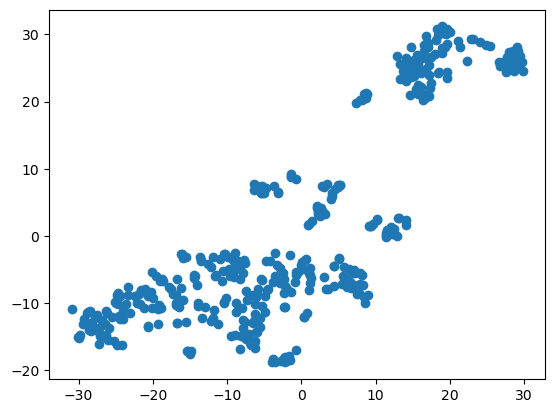

In [73]:
from matplotlib import pyplot as plt

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

plt.show()

# Задание 2

С помощью *KMeans* разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр *max_iter* должен быть равен 100, *random_state* сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

#### Разбивка на 3 кластера методом K-means

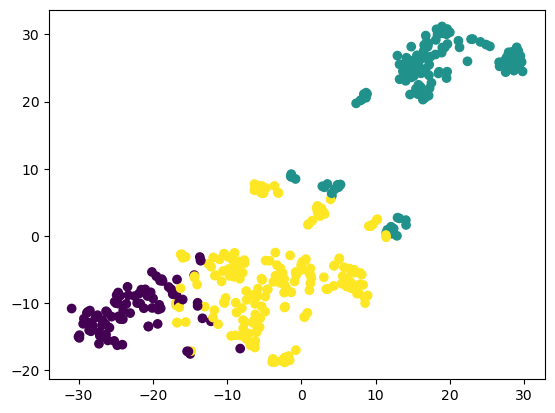

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(x_train_scaled)

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=labels_train)

plt.show()

#### Вычисление средних значений

In [75]:
print('Средняя стоимость недвижимости')
for i in range(3):
    print('Кластер {}: {}'.format(i+1, y_train.loc[labels_train == i, 'MEDV'].mean()))

Средняя стоимость недвижимости
Кластер 1: 27.788372093023252
Кластер 2: 16.165354330708666
Кластер 3: 24.958115183246072


In [76]:
print('Средняя криминогенная ситуация')
for i in range(3):    
    print('Кластер {}: {}'.format(i+1, x_train.loc[labels_train == i, 'CRIM'].mean()))

Средняя криминогенная ситуация
Кластер 1: 0.07356558139534886
Кластер 2: 10.797028425196853
Кластер 3: 0.42166020942408367
